<a href="https://colab.research.google.com/github/GcDevil1/gaurav/blob/main/knn_on_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

In [3]:
data = quandl.get("NSE/TATAGLOBAL")

In [4]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


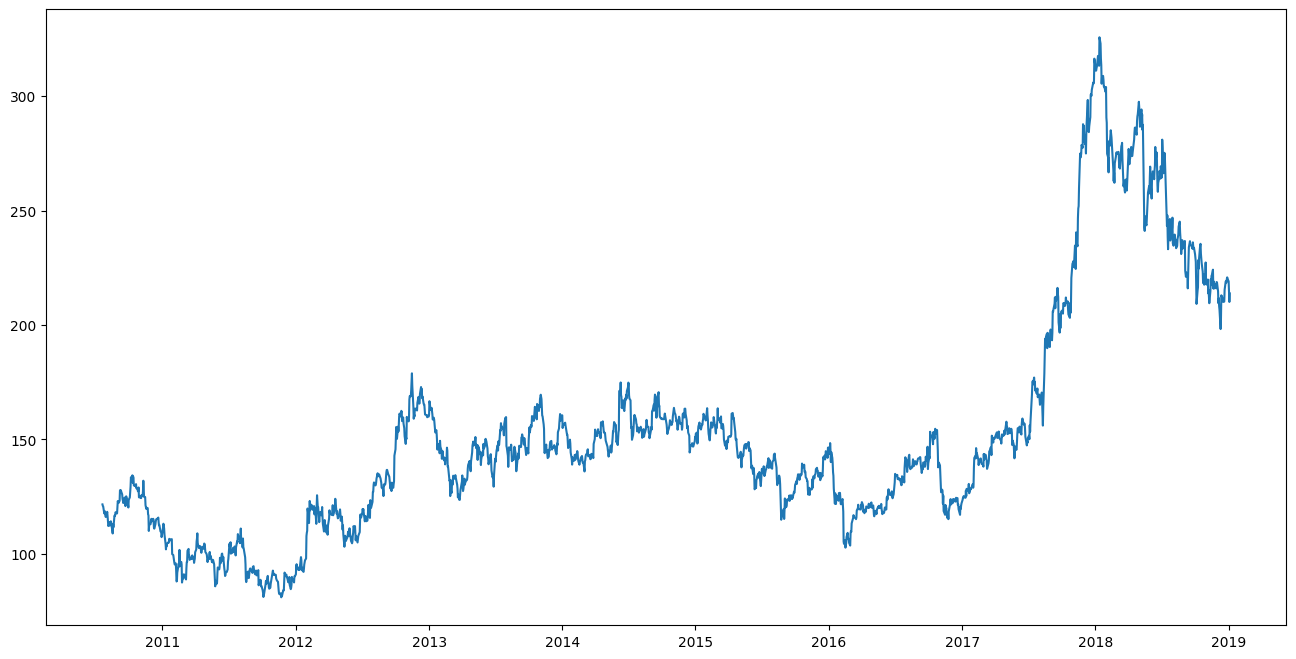

In [5]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

Classification Problem : Buy(+1) or sell(-1)the stock

In [6]:
data['Open-Close']=data['Open']-data['Close']
data['High-Low']=data['High']-data['Low']
data=data.dropna()

Input Features to predict whether customer should buy or sell the stock

In [7]:
x=data[['Open-Close','High-Low']]
x.head()

,Open-Close,High-Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


Intention is to store +1 for the buy signal and -1 for the sell single. The target variable is 'y' for classification task.

In [8]:
y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [9]:
y

array([-1, -1, -1, ..., -1,  1, -1])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=44)

Implementation of KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find ther best parameter
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

#fit the model
model.fit(x_train,y_train)

#accuracy score
accuracy_train=accuracy_score(y_train,model.predict(x_train))
accuracy_test=accuracy_score(y_test,model.predict(x_test))

print('train_data Accuracy: %.2f' %accuracy_train)
print('test_data Accuracy: %.2f' %accuracy_test)


train_data Accuracy: 0.68
test_data Accuracy: 0.51


In [16]:
prediction_classification=model.predict(x_test)

In [17]:
actual_predicted_data=pd.DataFrame({'Actual Class':y_test, 'Predicted Class':prediction_classification})

In [18]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
5,-1,-1
6,-1,1
7,-1,-1
8,-1,1
9,1,-1


In [15]:
y=data['Close']
y

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65
2010-07-28,118.25
2010-07-29,116.60
2010-07-30,116.05
2010-08-02,117.30


**Implementaion of KNN Regression**

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg=train_test_split(x,y,test_size=0.25)

#using gridsearch to find the best parameter
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg=GridSearchCV(knn_reg,params,cv=5)

#fit the model and make predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions=model_reg.predict(X_test_reg)

print(predictions)

[143.23333333 118.09333333 186.55       119.81333333 142.18
 119.78       140.62       131.92       172.9        114.54666667
 115.47333333 168.5        162.48666667 227.03666667 143.25
 115.64333333 154.32666667 153.74333333 191.78       129.72666667
 119.48333333 150.58333333 159.76       117.80333333 126.31333333
 140.99666667 152.99666667 233.42333333 133.72333333 145.29
 131.61       160.12666667 134.95       159.87666667 136.62
 168.67       148.42       131.33333333 116.35666667 163.88
 145.35333333 137.44666667 138.29       142.80666667 126.97333333
 135.72       137.32666667 152.75       130.4        148.29
 134.75       171.79666667 124.82       136.16333333 237.71666667
 172.56666667 149.42333333 136.08       172.88666667 154.48666667
 132.07333333 138.40333333 192.39666667 206.07333333 179.14
 119.86333333 125.10333333 142.00333333 151.93666667 131.29333333
 137.66666667 144.56       128.23       136.61666667 140.57666667
 219.83666667 120.96333333 148.92666667 146.55666667

In [26]:
#rmse (root mean square error)
rms=np.sqrt(np.mean(np.power((np.array(y_test_reg)-np.array(predictions)),2)))
rms

42.69240309655489

In [28]:
valid=pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [29]:
valid.head(10)

,Actual Close,Predicted Close value
Date,,
2014-12-12,152.95,143.233333
2017-05-17,152.85,118.093333
2017-06-02,154.85,186.550000
2016-08-26,139.90,119.813333
2015-05-20,145.95,142.180000
2011-04-21,103.05,119.780000
2011-01-11,101.90,140.620000
2015-12-14,134.35,131.920000
2018-08-16,239.35,172.900000
